# case 1 simulated data

## Description

1. never treated units

$$
Y_{it}(0)=\theta_{t}+\eta_{i}+\mathbf{X}_{i}^{T}\mathbf{\beta}_{t}+v_{it}
$$

2. treated units

$$
Y_{it}(g)=Y_{it}(0)+1\{t\ge g\}(e+1)+(u_{it}-v_{it})
$$

$e:=t-g$  the difference between the current time period and the time when a unit becomes treated, So the effect is:

$$
ATT(g,t)=e+1\ (t\ge g)
$$

In [1]:
library(did)

In [3]:
time.periods <- 4
sp <- reset.sim()
sp$te <- 0

set.seed(1814)
time.periods <- 4
sp$te.e <- 1:time.periods
dta <- build_sim_dataset(sp)

In [4]:
head(dta)

G,X,id,cluster,period,Y,treat
<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
3,-0.8762330,1,5,1,5.562556,1
3,-0.8762330,1,5,2,4.349213,1
3,-0.8762330,1,5,3,7.134037,1
3,-0.8762330,1,5,4,6.243056,1
2,-0.8738481,2,36,1,-3.659387,1
2,-0.8738481,2,36,2,-1.274099,1


In [5]:
example_attgt <- att_gt(yname = "Y",
                        tname = "period",
                        idname = "id",
                        gname = "G",
                        xformla = ~X,
                        data = dta
                        )

In [6]:
summary(example_attgt)


Call:
att_gt(yname = "Y", tname = "period", idname = "id", gname = "G", 
    xformla = ~X, data = dta)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 

Group-Time Average Treatment Effects:
 Group Time ATT(g,t) Std. Error [95% Simult.  Conf. Band]  
     2    2   0.9209     0.0618        0.7523      1.0896 *
     2    3   1.9875     0.0676        1.8029      2.1720 *
     2    4   2.9552     0.0626        2.7845      3.1259 *
     3    2  -0.0433     0.0634       -0.2163      0.1297  
     3    3   1.1080     0.0675        0.9239      1.2922 *
     3    4   2.0590     0.0649        1.8820      2.2360 *
     4    2   0.0023     0.0643       -0.1732      0.1779  
     4    3   0.0615     0.0651       -0.1162      0.2393  
     4    4   0.9523     0.0696        0.7624      1.1423 

In [7]:
library(ggplot2)

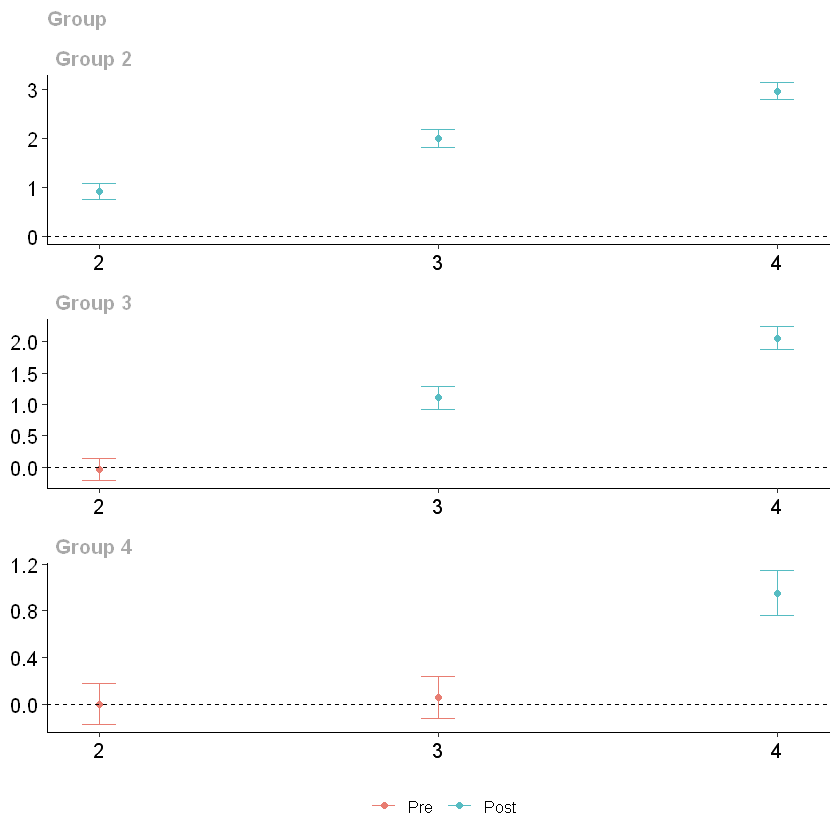

In [8]:
ggdid(example_attgt)

In [9]:
agg.simple <- aggte(example_attgt, type = "simple")
summary(agg.simple)


Call:
aggte(MP = example_attgt, type = "simple")

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


    ATT    Std. Error     [ 95%  Conf. Int.]  
 1.6583        0.0364     1.5869      1.7297 *


---
Signif. codes: `*' confidence band does not cover 0

Control Group:  Never Treated,  Anticipation Periods:  0
Estimation Method:  Doubly Robust


In [10]:
agg.es <- aggte(example_attgt, type = "dynamic")
summary(agg.es)


Call:
aggte(MP = example_attgt, type = "dynamic")

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on event-study/dynamic aggregation:  
    ATT    Std. Error     [ 95%  Conf. Int.]  
 1.9904        0.0377     1.9165      2.0644 *


Dynamic Effects:
 Event time Estimate Std. Error [95% Simult.  Conf. Band]  
         -2   0.0023     0.0672       -0.1784      0.1830  
         -1   0.0105     0.0402       -0.0975      0.1185  
          0   0.9929     0.0302        0.9118      1.0740 *
          1   2.0231     0.0438        1.9053      2.1410 *
          2   2.9552     0.0628        2.7863      3.1241 *
---
Signif. codes: `*' confidence band does not cover 0

Control Group:  Never Treated,  Anticipation Periods:  0
Estimation Method:  Doubly Robus

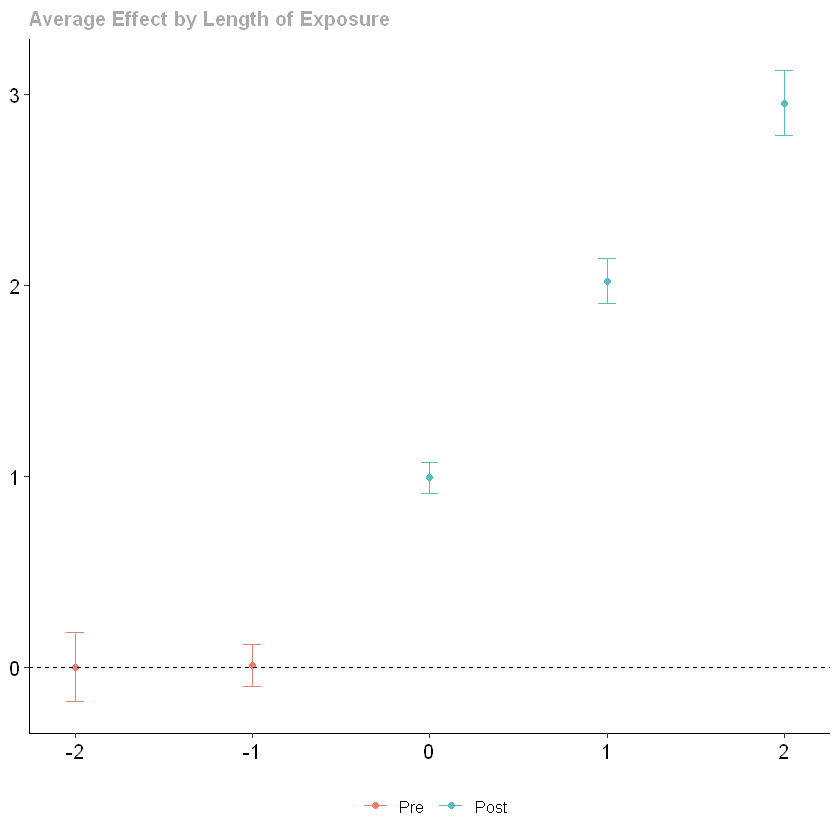

In [11]:
ggdid(agg.es)

In [12]:
agg.gs <- aggte(example_attgt, type = "group")
summary(agg.gs)


Call:
aggte(MP = example_attgt, type = "group")

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on group/cohort aggregation:  
   ATT    Std. Error     [ 95%  Conf. Int.]  
 1.488        0.0305     1.4283      1.5477 *


Group Effects:
 Group Estimate Std. Error [95% Simult.  Conf. Band]  
     2   1.9545     0.0509        1.8264      2.0827 *
     3   1.5835     0.0568        1.4405      1.7265 *
     4   0.9523     0.0656        0.7870      1.1176 *
---
Signif. codes: `*' confidence band does not cover 0

Control Group:  Never Treated,  Anticipation Periods:  0
Estimation Method:  Doubly Robust


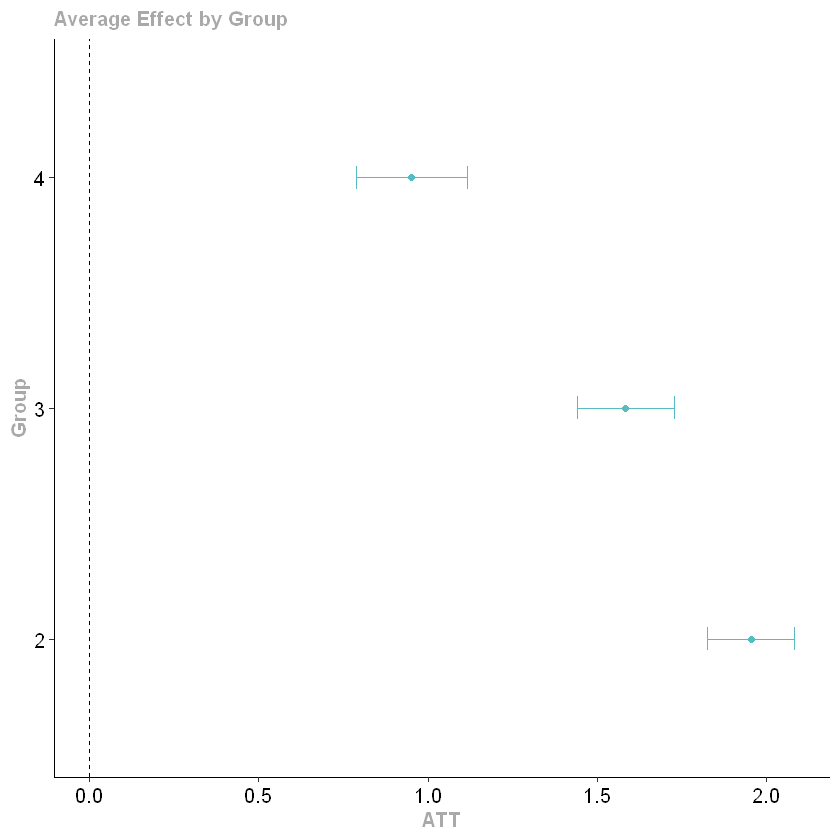

In [13]:
ggdid(agg.gs)

In [14]:
agg.ct <- aggte(example_attgt, type = "calendar")
summary(agg.ct)


Call:
aggte(MP = example_attgt, type = "calendar")

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on calendar time aggregation:  
    ATT    Std. Error     [ 95%  Conf. Int.]  
 1.4808        0.0366      1.409      1.5526 *


Time Effects:
 Time Estimate Std. Error [95% Simult.  Conf. Band]  
    2   0.9209     0.0662        0.7645      1.0774 *
    3   1.5491     0.0508        1.4291      1.6692 *
    4   1.9724     0.0501        1.8538      2.0910 *
---
Signif. codes: `*' confidence band does not cover 0

Control Group:  Never Treated,  Anticipation Periods:  0
Estimation Method:  Doubly Robust


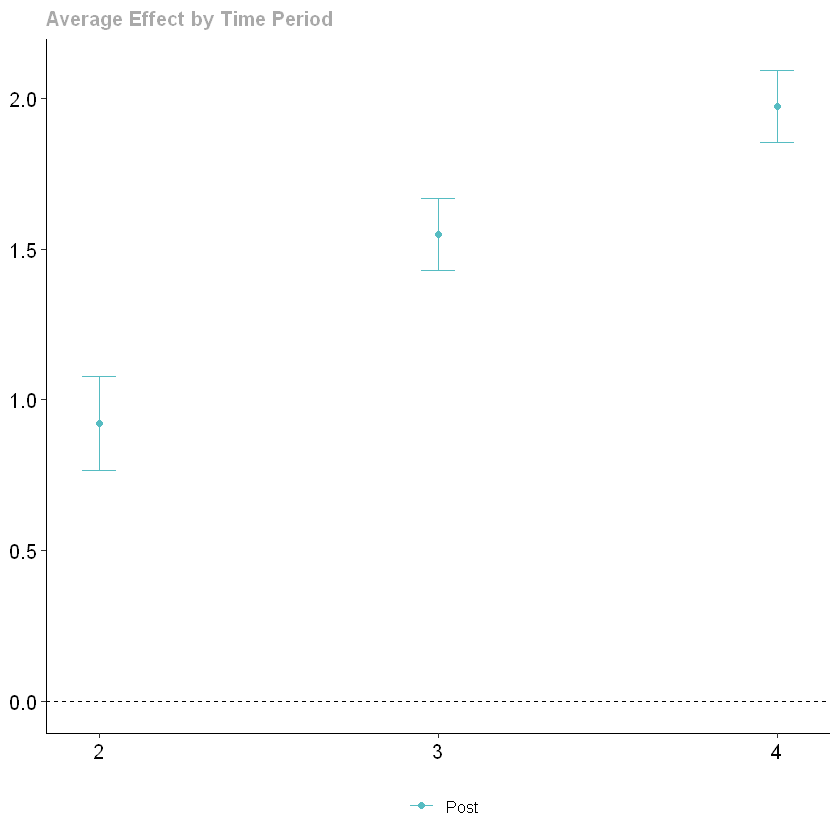

In [15]:
ggdid(agg.ct)

# case 2 real world data

In [16]:
data(mpdta)

In [18]:
# no covariates
mw.attgt <- att_gt(yname = "lemp",
                   gname = "first.treat",
                   idname = "countyreal",
                   tname = "year",
                   xformla = ~1,
                   data = mpdta,
                   )

In [19]:
summary(mw.attgt)


Call:
att_gt(yname = "lemp", tname = "year", idname = "countyreal", 
    gname = "first.treat", xformla = ~1, data = mpdta)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 

Group-Time Average Treatment Effects:
 Group Time ATT(g,t) Std. Error [95% Simult.  Conf. Band]  
  2004 2004  -0.0105     0.0248       -0.0777      0.0567  
  2004 2005  -0.0704     0.0319       -0.1566      0.0158  
  2004 2006  -0.1373     0.0399       -0.2453     -0.0292 *
  2004 2007  -0.1008     0.0365       -0.1995     -0.0021 *
  2006 2004   0.0065     0.0225       -0.0543      0.0674  
  2006 2005  -0.0028     0.0203       -0.0577      0.0522  
  2006 2006  -0.0046     0.0179       -0.0529      0.0437  
  2006 2007  -0.0412     0.0202       -0.0959      0.0135  
  2007 2004   0.0305     0.0156      

In [20]:
# with covariates
mw.attgt.X <- att_gt(yname = "lemp",
                   gname = "first.treat",
                   idname = "countyreal",
                   tname = "year",
                   xformla = ~lpop,
                   data = mpdta,
                   )

In [21]:
summary(mw.attgt.X)


Call:
att_gt(yname = "lemp", tname = "year", idname = "countyreal", 
    gname = "first.treat", xformla = ~lpop, data = mpdta)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 

Group-Time Average Treatment Effects:
 Group Time ATT(g,t) Std. Error [95% Simult.  Conf. Band]  
  2004 2004  -0.0145     0.0247       -0.0777      0.0486  
  2004 2005  -0.0764     0.0315       -0.1570      0.0041  
  2004 2006  -0.1404     0.0374       -0.2361     -0.0448 *
  2004 2007  -0.1069     0.0315       -0.1875     -0.0263 *
  2006 2004  -0.0005     0.0234       -0.0605      0.0596  
  2006 2005  -0.0062     0.0187       -0.0542      0.0418  
  2006 2006   0.0010     0.0205       -0.0514      0.0534  
  2006 2007  -0.0413     0.0212       -0.0955      0.0129  
  2007 2004   0.0267     0.0148   